In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [11]:
df = pd.read_csv("data/train.csv")

## About Dataset

__Overview__  
자전거 공유 시스템은 도시 곳곳에서 키오스크 네트워크를 통해 회원가입, 자전거 대여/반납이 자동화 되어 있는 자전거 대여 수단이다.   
이 시스템을 사용하면 사람들은 한 장소에서 자전거를 대여해서 필요에 따라 다른 장소에 반납할 수 있다.   
현재 전 세계에 500개가 넘는 자전거 공유 플랫폼이 있다.

__Data Fields__
- datatime : 날짜+시간(YYYY-MM-DD HH-MM-SS)
- season : 1(1-3월), 2(4-6월), 3(7-9월), 4(10-12월)
- holiday : 0(not a holiday), 1(holiday) -> [미국 공휴일 정보]('https://kr.usembassy.gov/ko/embassy-consulate-ko/holiday-ko/')
- workingday 0(주말), 1(평일)
- weather : 
    - 1(맑음) : Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2(흐림) : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3(약한 눈/비) : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4(강한 눈/비) : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : 온도(Celsius)
- atemp : 체감온도(Celsius)
- humidity : 습도
- windspeed : 바람세기
- casual : 비회원 대여 수
- registered : 회원 대여 수
- count : 총 대여 수(casual + registered)

## Data summary

In [12]:
# 데이터 크기
df.shape

(10886, 12)

In [13]:
# 데이터 일부 미리보기
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# 데이터 타입 확인
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Engineering

- Create new columns "date,"hour","weekDay","month" from "datetime" column.
- Coerce the datatype of "season","holiday","workingday" and "weather" to category.
- Drop the datetime column as we already extracted useful features from it.

__Categorical Data__
- season : 1(1-3월), 2(4-6월), 3(7-9월), 4(10-12월)
- holiday : 0(not a holiday), 1(holiday)
- workingday : 0(주말), 1(평일)
- weather : 
    - 1(Clear, Few clouds, Partly cloudy, Partly cloudy)
    - 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    - 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    - 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

__Datetime 컬럼을 활용해 새로운 컬럼을 생성한다.__

In [15]:
# datetime 컬럼의 값을 split한 뒤 0번째 값을 date 컬럼으로 만들어준다.
df["date"] = df.datetime.apply(lambda x : x.split()[0])  
# datetime 컬럼의 값을 split한 뒤 1번째 값을 hour 컬럼으로 만들어준다.
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
# calendar 함수
df["weekday"] = df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
df["month"] = df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, "%Y-%m-%d").month])
# map 함수
df["season"] = df.season.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


__Category Type 변환하기__

In [17]:
categoryVariableList = ["hour", "weekday", "month", "season", "weather", "holiday", "workingday"]
for var in categoryVariableList:
    df[var] = df[var].astype("category")  #? 굳이 category type으로 바꿔줘야 하는 이유는?

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


__불필요한 컬럼 제거__

In [19]:
df = df.drop(["datetime"], axis=1)  # datatime 변수 삭제

__data type별 컬럼 개수 시각화__

[Text(0.5, 0, 'variableTypeariable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables DataType Count')]

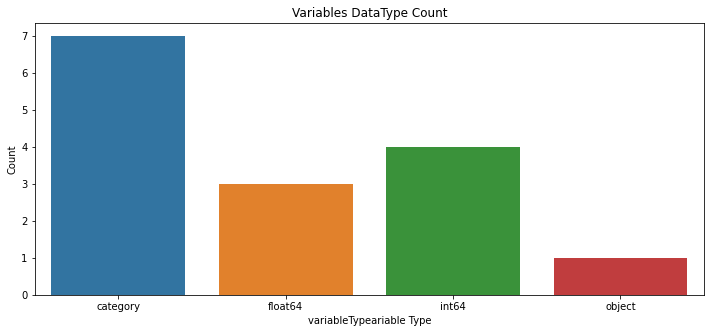

In [21]:
typesCountSerie = df.dtypes.value_counts()

# format columns as arrays of either strings or integers
# typeNames are easier to sort as array of `string` rather than an array of `dtype`
typeNamesColumn = list(map(lambda t: t.name , typesCountSerie.index.values));
typeCountColumn = typesCountSerie.values

# create an initial dataframe, with multiple occurences of the same "variableType"
intialDataTypeDf = pd.DataFrame({
    "variableType": typeNamesColumn, 
    "count": typeCountColumn
})

# Group initial data frame by "variableType", 
# then reset_index to have a proper dataframe
groupedDataTypeDf = intialDataTypeDf.groupby(['variableType']).sum()[['count']].reset_index()

# Plot as expect
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=groupedDataTypeDf, x="variableType",y="count", ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

### 결측치 분석

__Skewness In Distribution__

<AxesSubplot:>

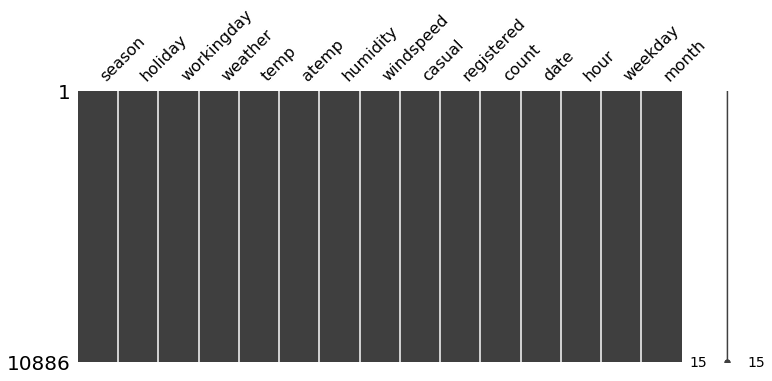

In [22]:
# import missingno as msno
msno.matrix(df, figsize=(12,5))

### 이상치 확인

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

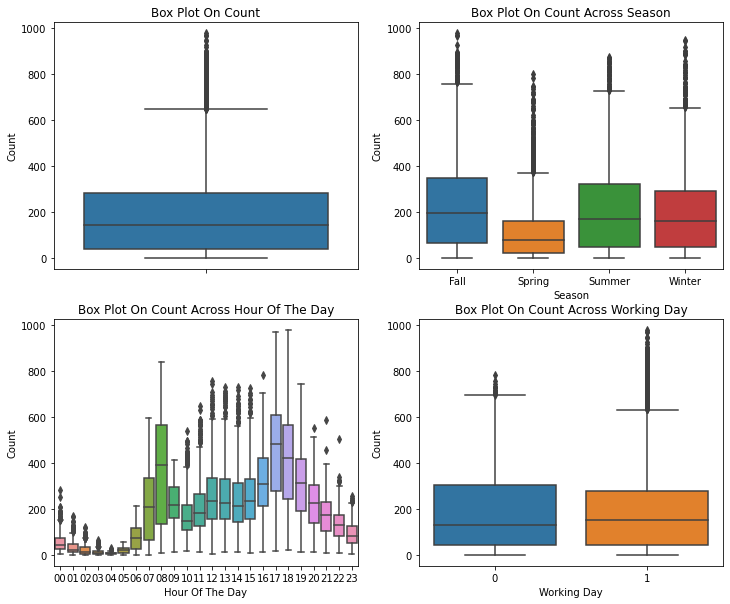

In [23]:
fig,ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df, y='count', orient='v', ax=ax[0][0])  # orient="h"(defalut, horizontal), orient="v"(vertical)
sns.boxplot(data=df, x='season', y='count', orient='v', ax=ax[0][1])
sns.boxplot(data=df, x='hour', y='count', orient='v', ax=ax[1][0])
sns.boxplot(data=df, x='workingday', y='count', orient='v', ax=ax[1][1])

ax[0][0].set(ylabel='Count',title="Box Plot On Count")
ax[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
ax[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
ax[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

count 컬럼의 이상치를 제거해준다.

In [24]:
dfWithoutOutliers = df[np.abs(df['count'] - df['count'].mean()) <= (3*df['count'].std())]

In [25]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",dfWithoutOutliers.shape) # 약 150여개의 이상치가 제거된 것을 확인할 수 있다.

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


### 상관관계 분석(Correlation Analysis)

In [26]:
# 상관계수 구하기
df_corr = df.corr()
df_corr

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<AxesSubplot:>

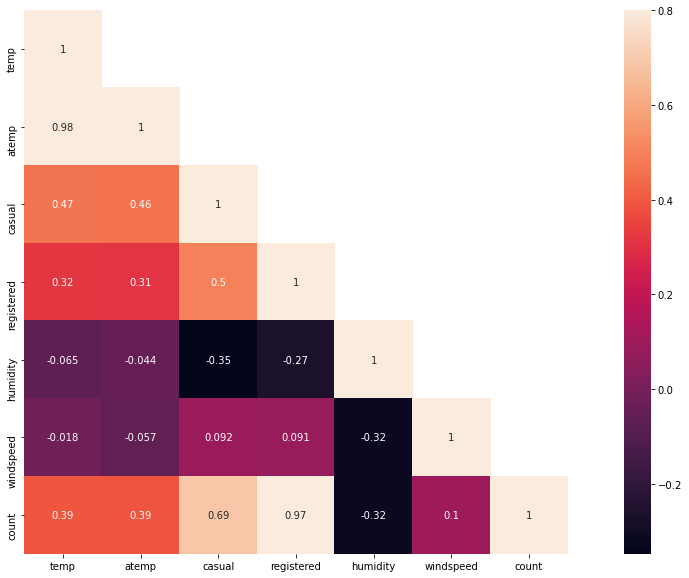

In [27]:
# 시각화
corrMatt = df[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]].corr()  # df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

보통 heatmap 하면, 사각형 박스를 생각하게 됩니다.  
그러나 row와 column 이 동일해서 1의 값을 지니는 대각선을 중심으로 왼쪽 삼각형 부분과, 오른쪽 삼각형 부분은 대칭으로 동일한 값을 가집니다.   
똑같은 값들을  굳이 양쪽 다 보여줄 필요가 없는 것이죠. 그래서 상관계수를 시각화 할때는 한쪽 삼각형만 나타내는 것이 더 깔끔합니다.

<AxesSubplot:xlabel='humidity', ylabel='count'>

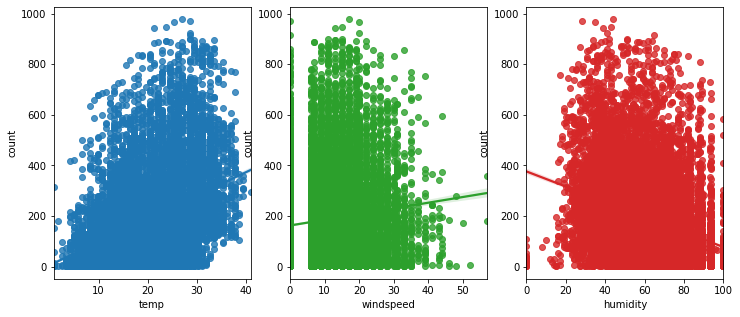

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(data=df, x='temp', y='count', ax=ax1)
sns.regplot(data=df, x='windspeed', y='count', color='tab:green', ax=ax2)
sns.regplot(data=df, x='humidity', y='count', color='tab:red', ax=ax3)

### Visualizing Distribution Of Data

C:\Users\kyung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kyung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229772, 4.562423868087808, 0.958117678090961))

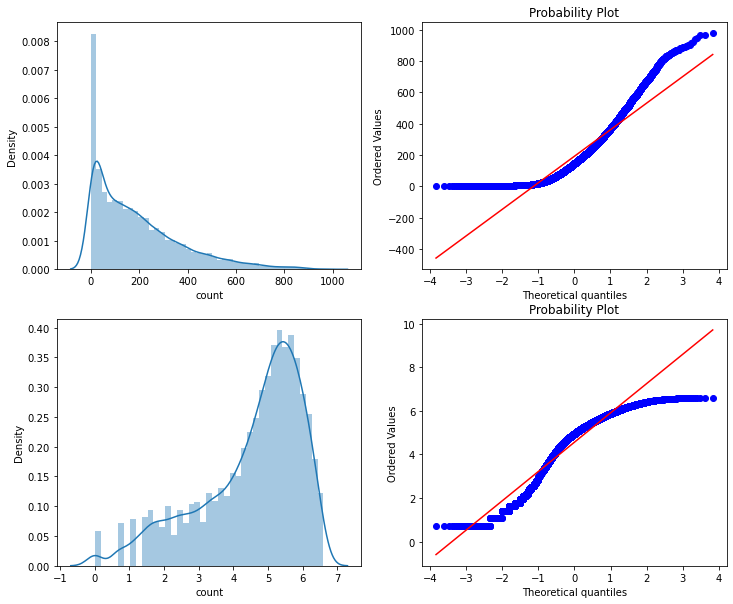

In [29]:
fig,ax = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)
sns.distplot(df['count'], ax=ax[0][0])
stats.probplot(df['count'], dist='norm', fit=True, plot=ax[0][1])
sns.distplot(np.log(dfWithoutOutliers['count']), ax=ax[1][0])
stats.probplot(np.log1p(dfWithoutOutliers['count']), dist='norm', fit=True, plot=ax[1][1])

### Visualizing Count Vs (Month, Season, Hour, Weekday, Usertype)

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'User Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of the Day Across User Type'),
 None]

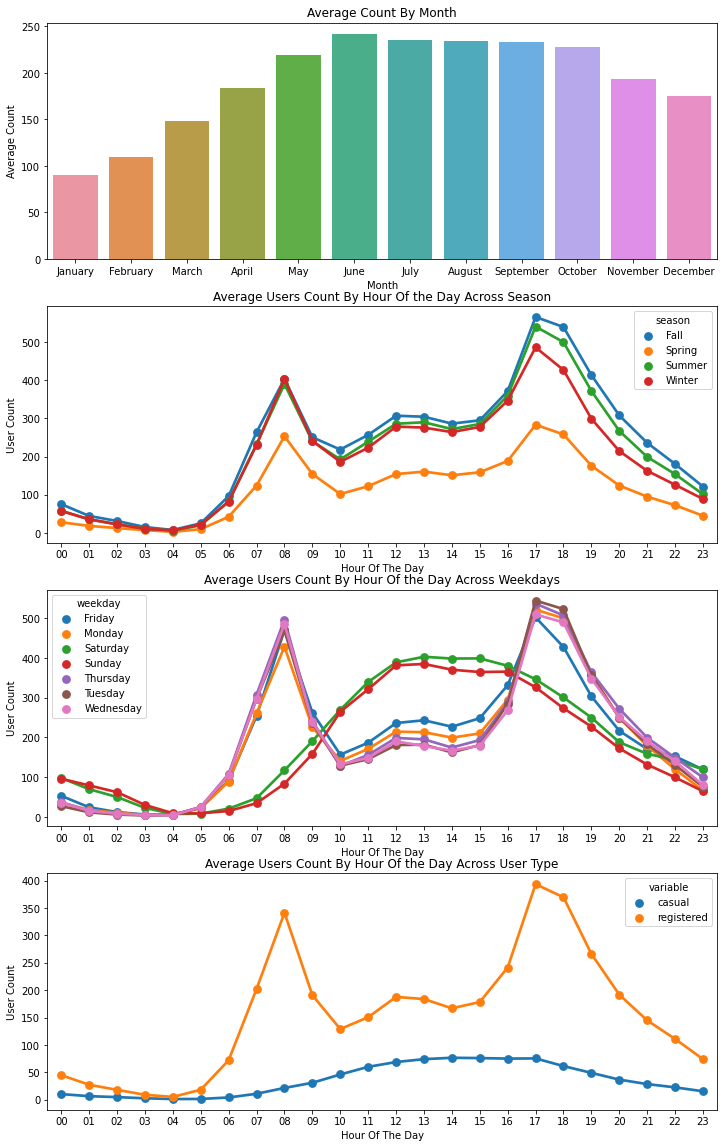

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")['count'].mean()).reset_index()  #? reset_index()
monthSorted = monthAggregated.sort_values(by='count', ascending=False)
sns.barplot(data=monthSorted, x="month", y="count", ax=ax1, order=sortOrder)
ax1.set(xlabel='Month', ylabel='Average Count', title='Average Count By Month')

hourAggregated = pd.DataFrame(df.groupby(["hour","season"], sort=True)["count"].mean()).reset_index()
sns.pointplot(data=hourAggregated, x=hourAggregated["hour"], y=hourAggregated["count"], hue=hourAggregated["season"], join=True, ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='User Count', title="Average Users Count By Hour Of the Day Across Season", label='big')

hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(data=hourAggregated, x=hourAggregated["hour"], y=hourAggregated["count"], hue=hourAggregated["weekday"], join=True, ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='User Count', title="Average Users Count By Hour Of the Day Across Weekdays", label='big')

hourTransformed = pd.melt(df[['hour', 'casual', 'registered']], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(['hour', 'variable'], sort=True)['value'].mean()).reset_index()
sns.pointplot(data=hourAggregated, x=hourAggregated['hour'], y=hourAggregated['value'], hue=hourAggregated['variable'], hue_order=['casual', 'registered'], join=True, ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='User Count', title="Average Users Count By Hour Of the Day Across User Type", label='big')

### Filling 0's In windspeed Using Random Forest

In [31]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [32]:
print(train_data.shape)
print(test_data.shape)

(10886, 12)
(6493, 9)


__Combine Train And Test__

In [33]:
data = train_data.append(test_data)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

__Feature Engineering__

In [34]:
data['date'] = data.datetime.apply(lambda x : x.split()[0])
data['hour'] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data['year'] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data['weekday'] = data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
data['month'] = data.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)

__Random Forest Model To Predict 0's in Windspeed__

In [35]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data['windspeed'] == 0]
dataWindNot0 = data[data["windspeed"] != 0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X=dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

__Coercing To Categorical Type__

In [36]:
categoricalFeatureNames = ["season", "holiday", "workingday", "weather", "weekday", "month", "year", "hour"]
numericalFeatureNames = ["temp", "humidity", "windspeed", "atemp"]
dropFeatures = ["casual", "count", "datetime", "date", "registered"]

In [37]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

__Train, Test 데이터 나누기__

In [38]:
train_data = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
test_data = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = test_data["datetime"]
yLabels = train_data["count"]
yLabelsRegistered = train_data["registered"]
yLabelsCasual = train_data["casual"]

__Dropping Unnecessary Variables__

In [39]:
train_data = train_data.drop(dropFeatures, axis=1)
test_data = test_data.drop(dropFeatures, axis=1)

__RMSLE Scorer__

In [40]:
def rmsle(y, y_, convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))